Data source: https://www.kaggle.com/c/emvic/discussion/1730

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import math

In [2]:
from fixation_saccade_classifier import *

# Get data

In [3]:
def read_data(file_name):
    f = open(file_name)
    f.readline()
    samples = []
    target = []
    for line in f:
        line = line.strip().split(",")
        sample = [float(x) for x in line[1:]]
        samples.append(sample)
        target.append(line[0])
    return (samples, target)

In [4]:
training, target = read_data("train.csv")

In [5]:
lx, ly, rx, ry = [], [], [], []
for i in range(len(training)):
    lx.append(training[i][:2048])
    ly.append(training[i][2048:4096])
    rx.append(training[i][4096:6144])
    ry.append(training[i][6144:8192])

In [6]:
target = np.array(target)
lx = np.array(lx[0])
ly = np.array(ly[0])
rx = np.array(rx[0])
ry = np.array(ry[0])

# I-DT

In [7]:
classifier = IDTFixationSaccadeClassifier(threshold = 100.0, win_len = 50)
fixations, saccades, fixation_colors, saccades_colors = classifier.fit_predict(lx, ly)

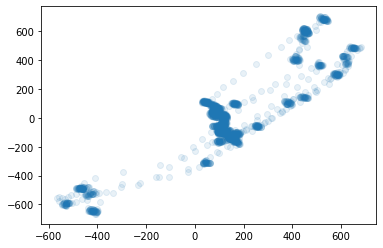

In [8]:
plt.scatter(lx, ly, alpha = 0.1)

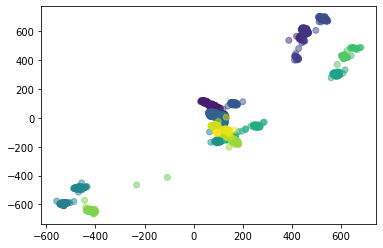

In [9]:
plt.scatter(lx[fixations], ly[fixations], c=fixation_colors, alpha = 0.5)

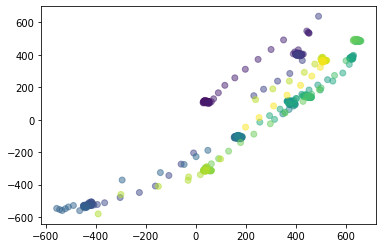

In [10]:
plt.scatter(lx[saccades], ly[saccades], c=saccades_colors, alpha = 0.5)

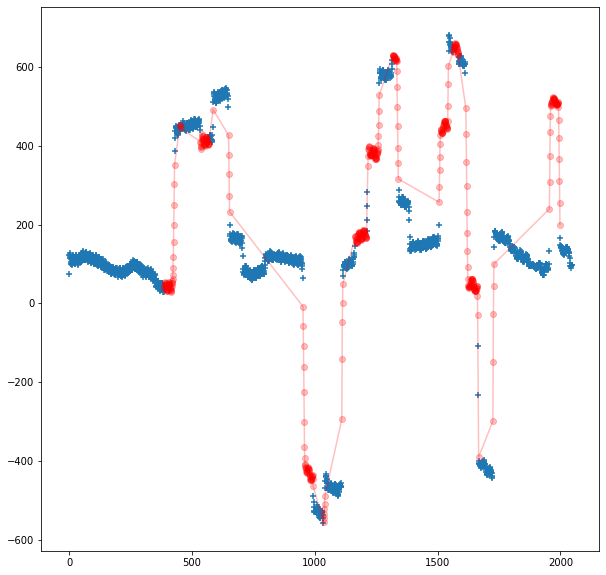

In [11]:
plt.figure(figsize = (10, 10))
plt.plot(saccades, lx[saccades], marker='o', color = 'red', alpha = 0.25)
plt.scatter(fixations, lx[fixations], marker='+')

# I-VT

In [12]:
classifier = IVTFixationSaccadeClassifier(threshold = 15.0)
fixations, saccades, fixation_colors, saccades_colors = classifier.fit_predict(lx, ly)

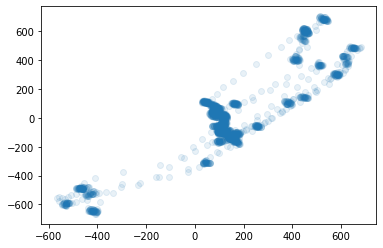

In [13]:
plt.scatter(lx, ly, alpha = 0.1)

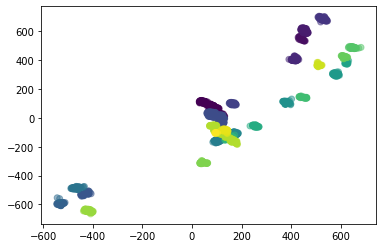

In [14]:
plt.scatter(lx[fixations], ly[fixations], c=fixation_colors, alpha = 0.5)

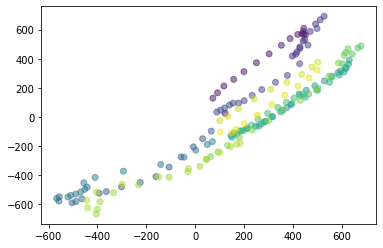

In [15]:
plt.scatter(lx[saccades], ly[saccades], c=saccades_colors, alpha = 0.5)

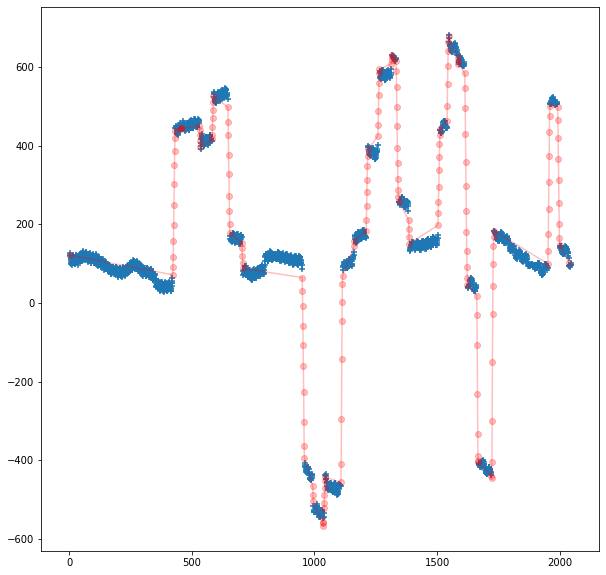

In [16]:
plt.figure(figsize = (10, 10))
plt.plot(saccades, lx[saccades], marker='o', color = 'red', alpha = 0.25)
plt.scatter(fixations, lx[fixations], marker='+')

# I-HMM

In [17]:
classifier = IHMMFixationSaccadeClassifier(fix_median = 1.0,
            fix_variance = 10.0,
            sacc_median = 80.0,
            sacc_variance = 60.0,
            prob_fix_fix = math.log(0.95),
            prob_sacc_sacc = math.log(0.95),
            prob_fix_sacc = math.log(0.95),
            prob_sacc_fix = math.log(0.95))
fixations, saccades, fixation_colors, saccades_colors = classifier.fit_predict(lx, ly)

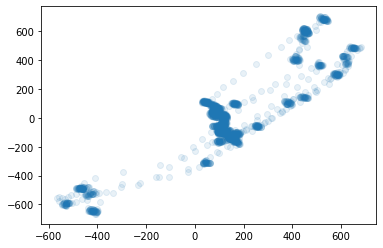

In [18]:
plt.scatter(lx, ly, alpha = 0.1)

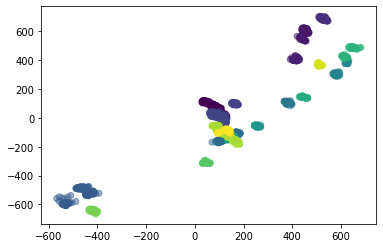

In [19]:
plt.scatter(lx[fixations], ly[fixations], c=fixation_colors, alpha = 0.5)

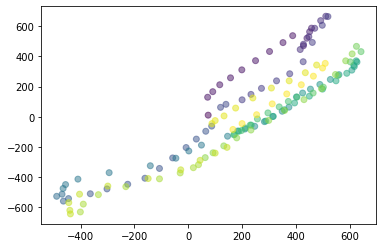

In [20]:
plt.scatter(lx[saccades], ly[saccades], c=saccades_colors, alpha = 0.5)

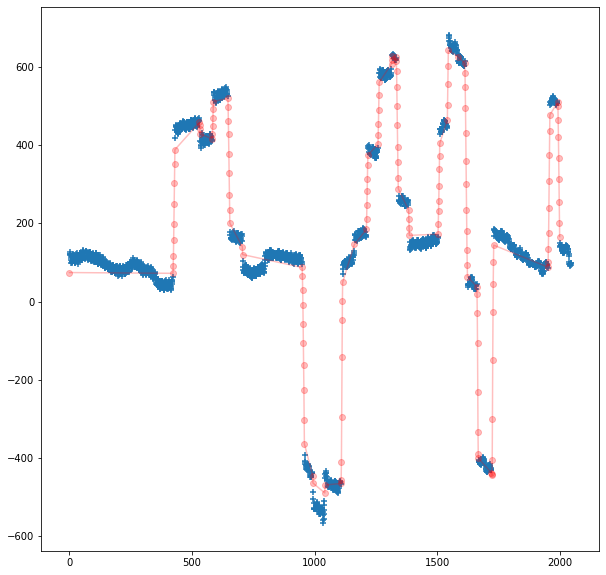

In [21]:
plt.figure(figsize = (10, 10))
plt.plot(saccades, lx[saccades], marker='o', color = 'red', alpha = 0.25)
plt.scatter(fixations, lx[fixations], marker='+')

# I-AOI

In [22]:
classifier = IAOIFixationSaccadeClassifier(threshold = 15.0, areas = [[-100.0, -100.0, 100.0, 100.0]])
fixations, fixation_colors = classifier.fit_predict(lx, ly)

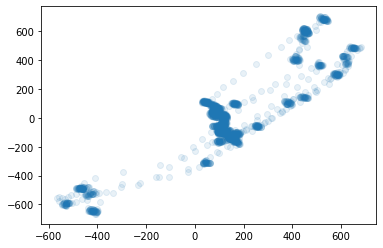

In [23]:
plt.scatter(lx, ly, alpha = 0.1)

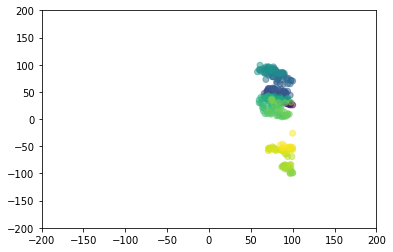

In [24]:
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.scatter(lx[fixations], ly[fixations], c=fixation_colors, alpha = 0.5)
plt.show()

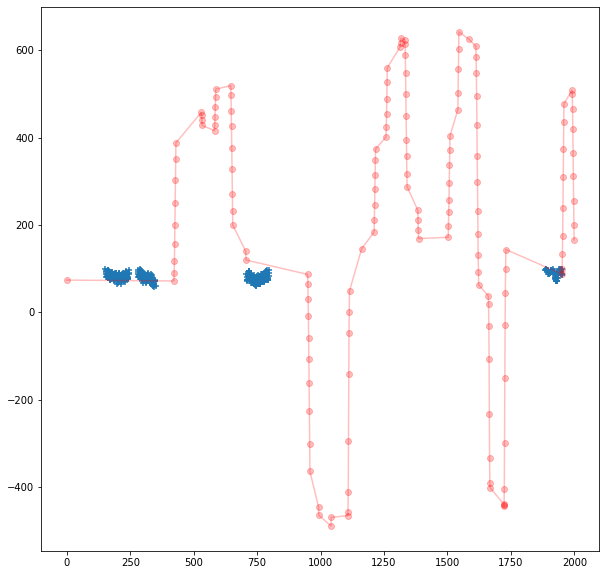

In [25]:
plt.figure(figsize = (10, 10))
plt.plot(saccades, lx[saccades], marker='o', color = 'red', alpha = 0.25)
plt.scatter(fixations, lx[fixations], marker='+')

# I-VT (window)

In [26]:
classifier = IWVTFixationSaccadeClassifier(threshold = 15.0, win_len = 10)
fixations, saccades, fixation_colors, saccades_colors = classifier.fit_predict(lx, ly)

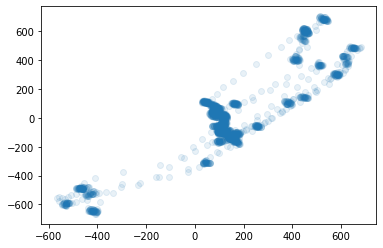

In [27]:
plt.scatter(lx, ly, alpha = 0.1)

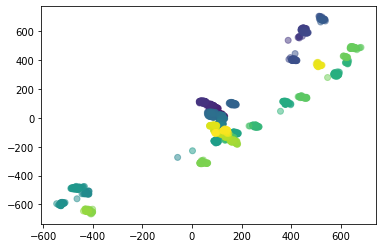

In [28]:
plt.scatter(lx[fixations], ly[fixations], c=fixation_colors, alpha = 0.5)

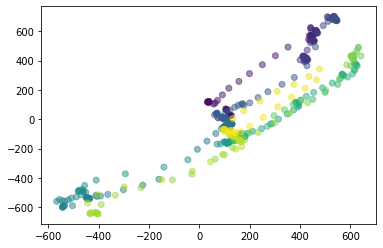

In [29]:
plt.scatter(lx[saccades], ly[saccades], c=saccades_colors, alpha = 0.5)

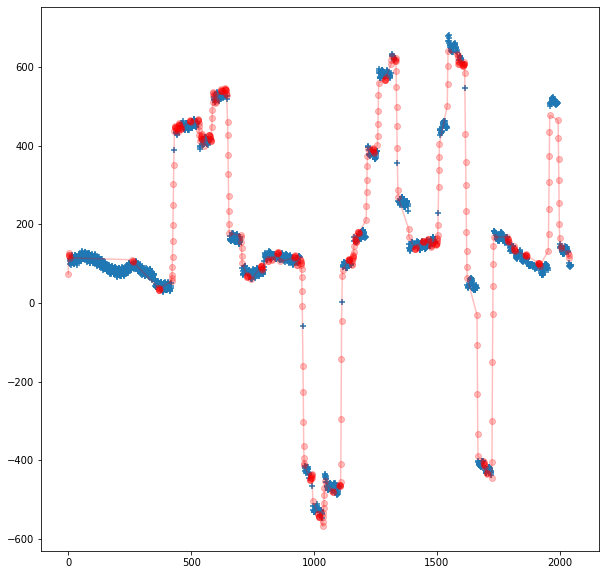

In [30]:
plt.figure(figsize = (10, 10))
plt.plot(saccades, lx[saccades], marker='o', color = 'red', alpha = 0.25)
plt.scatter(fixations, lx[fixations], marker='+')